# QuTip Practice Codes

In [1]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm, sinm, cosm

In [3]:
# We make use of Quantum Object Class using matrix representation
# since we need a data structure to store the properties of a 
# quantum operator and its eigenstates and values.
# The output corresponds to a 1X1 matrix with one zero entry.
# Names of classes are capitalized unlike the functions in Python
print(Qobj(), '\n \n********************** \n')

# Creating a user-defined data set by passing them in the form of
# arrays into the Q. Object class
print(Qobj([[1], [2], [3], [4], [5]]), '\n \n********************** \n') # 5X1 matrix - column vector

x = np.array([[1, 2, 3, 4, 5]])
print(Qobj(x), '\n \n********************** \n')

r = np.random.rand(4, 4)
print(Qobj(r), '\n \n********************** \n')

# Although dims and shape appear to be the same,
# dims keep track of the shapes of the individual 
# components of a multipartite system - check tensor section

# QuTip has built-in functions of commonly used state vectors
# Fock state ket vector: N = no. of levels in Hilbert space, #m = level containing excitation
N = 4
m = 0
alpha = 4+1j
f = fock(4, 3)
print(f, '\n \n********************** \n')

#Empty ket vector
zero_ket(N)

#Fock density matrix (outer product of basis) - hermitian by default
# Arguments same as fock(N,m)
fock_dm(N,3)

#Coherent state, alpha = complex no. (eigenvalue)
coherent(N,alpha)

#Coherent density matrix (outer product)
coherent_dm(N,alpha)

#Thermal density matrix (for n particles), n = particle number expectation value 
print(thermal_dm(N,1010)) # What does this mean by particle number expectation value?

print(coherent_dm(N,alpha).dims) 

NameError: name 'Qobj' is not defined

In [ ]:
q = destroy(4)
print(q)

In [ ]:
x = sigmax()

In [ ]:
q + 5

In [ ]:
x * x

In [ ]:
q ** 3

In [ ]:
x / np.sqrt(2)

In [ ]:
vac = basis(5, 0)
print(vac)
a = destroy(5)
print(a)

In [ ]:
print(a.dag())
print(a.dag() * vac)

In [ ]:
c = create(5)
print(c)

In [ ]:
print(c * vac)

In [ ]:
print(c * c * vac)
print(c ** 2 * vac)

In [ ]:
print(c * a * vac) # Applying number operator on |0>
print(c*a)

In [ ]:
print(c * a * (c * vac)) # Applying number operator on |1>

In [ ]:
print(c * a * (c**2 * vac).unit()) # Applying number operator on |2>

In [ ]:
ket = basis(5, 2)
print(ket)
n = num(5)
print(n)
print(n * ket)
ket = (basis(5, 0) + basis(5, 1)).unit()
print(ket)
print(n * ket)

In [ ]:
ket = basis(5, 2)
print(ket * ket.dag())

In [ ]:
print(fock_dm(5, 2))

In [ ]:
print(ket2dm(ket))

In [ ]:
# x = coherent_dm(5, 1.25)

# y = coherent_dm(5, np.complex(0, 1.25))  # <-- note the 'j'

# z = thermal_dm(5, 0.125)

# print(np.testing.assert_almost_equal(fidelity(x, x), 1))

# np.testing.assert_almost_equal(hellinger_dist(x, y), 1.3819080728932833)


In [ ]:
vac = basis(5, 0)
print(vac)

one = basis(5, 1)
print(one)

c = create(5)
print(c)

N = num(5)
print(N)

np.testing.assert_almost_equal(expect(N, vac), 0)

np.testing.assert_almost_equal(expect(N, one), 1)

coh = coherent_dm(5, 1.0j)

np.testing.assert_almost_equal(expect(N, coh), 0.9970555745806597)

cat = (basis(5, 4) + 1.0j * basis(5, 3)).unit()

np.testing.assert_almost_equal(expect(c, cat), 0.9999999999999998j)
print(expect(N, (c**2 * vac).unit()))

In [ ]:
Sxi = sigmax()
Sxi1 = sigmax()

# Using Numpy and Scipy

In [2]:
## Defining XY Hamiltonian 1D - nearest neighbor interactions only
sx = np.array([[0,1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
iden = np.eye(2)
sx1sx2 = np.matmul(np.kron(sx, iden),np.kron(iden, sx))
sy1sy2 = np.matmul(np.kron(sy, iden),np.kron(iden, sy))
H = sx1sx2 + sy1sy2
# print(H)
N = 2
Hm = np.zeros((2**N, 2**N), dtype = np.complex_)
Sxisxi1 = np.zeros((2**N, 2**N), dtype = np.complex_)
Syisyi1 = np.zeros((2**N, 2**N), dtype = np.complex_)
for i in range(N):
    Sxisxi1 = np.matmul(np.kron(sx, np.eye(2**(N-1))), np.kron(np.eye(2**(N-1)), sx))
    Syisyi1 = np.matmul(np.kron(sy, np.eye(2**(N-1))), np.kron(np.eye(2**(N-1)), sy))
    Hm += Sxisxi1 + Syisyi1  

# normed_matrix = normalize(Hm, axis=1, norm='l1') - applicable only for real entry matrices
print(Hm)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 4.+0.j 0.+0.j]
 [0.+0.j 4.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [65]:
# Pauli Matrices
sigmaZ = sp.csc_matrix([[1, 0], [0, -1]])
sigmaX = sp.csc_matrix([[0, 1], [1, 0]])
sigmaY = sp.csc_matrix([[0, -1j], [1j, 0]])
sigmaI = sp.csc_matrix([[1, 0], [0, 1]])
sigmaH = sp.csc_matrix([[1, 1], [1, -1]])

Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
I = np.array([[1, 0], [0, 1]])

H = np.array([[1, 1], [1, -1]])

params = {
'N' : 1,
'tau_list':[0.05, 0.1, 0.5, 1],
'tau': 0.1,
'n': 2,
'alpha': 1,
'T': 10,
    'R': [],
    'r': [],
    'alpha': 1,
'opH': [X, Y], # Need to change this specific to Model
'pulses': [I, Z] # Need to change this specific to Model
}

In [66]:
def normalizeWF(psi,**kwargs):
    shape, dtype = psi.shape, psi.dtype
    NWF = psi
    if np.array_equal(psi, np.zeros(shape, dtype = dtype)) == True:
        NWF = psi
    elif np.vdot(psi, psi) == 0:
        NWF = psi
    else:
        NWF = psi/(np.sqrt(np.vdot(psi, psi)))
    return NWF

def sparseMatrices(a, **kwargs):
    return sp.csc_matrix(a)
      
def tensorOperators(matrix2D, **kwargs):
    return reduce(sp.kron, (sp.eye(2**kwargs['a']), matrix2D , sp.eye(2**kwargs['b'])))

def initialVals(params, **kwargs):
    n = params['n']
    N = params['N']
    alpha = params['alpha']
    op = params['opH']
    pulses = params['pulses']
    r = list(np.random.randint(low = 1,high=30,size=N))
    R = [np.power(1/x, alpha) for x in r]
    # r = np.random.random_sample(size = 2**N)
    psi0 = np.random.randn(2**N)
    psi_nm = normalizeWF(psi0)
    return n, N, r, op, pulses, psi_nm, R, alpha
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)

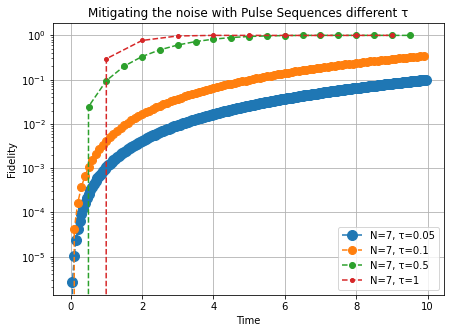

In [67]:
def TogglingFrameH(params, **kwargs):
    N, TFH = params['N'], []
    Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    pulses, opH = params['pulses'], params['opH']
    for p in pulses:
        for op in opH:
            for i in range(N):
                matrx = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += tensorOperators(matrx, a = i, b = N-1-i)
        TFH.append(Hk)
        Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    return TFH

# TFH = TogglingFrameH(params)

def TimeEvolOpForTFH(params, **kwargs):
    TFH, unitary_timeOp, expTFH, tau, n = kwargs['TFH'], [], np.eye(2**params['N']), params['tau'], params['n']
    for i, hk in enumerate(TFH):
        expTFH = expm(-1j*tau*hk/n) @ expTFH
    t_list = np.arange(0, params['T'], tau)
    unitary_timeOp = [np.linalg.matrix_power(expTFH, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))

params['N'] = 7
params['pulses'] = [I, Z, X, Y]
params['n'] = len(params['pulses'])
params['opH'] = [X, Y, Z]
params['alpha'] = 2
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
mss=10

plt.figure(figsize=[7,5])
for tau in params['tau_list']:
    params['tau'] = tau
    F = []
    uOp, t = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))
    psi_t = [u@psi_nm for i,u in enumerate(uOp)]
    F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#     print(F)
    plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=mss)
    mss -=2
    plt.yscale("log")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Fidelity")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
plt.show()

In [8]:
def H_noise(params, **kwargs):
    N = params['N']
    op = params['opH']
    Hnoise = np.zeros((2**N, 2**N))
    for i in range(N):
        Hnoise += tensorOperators(sparseMatrices(op[0]), a = i, b = N-1-i)
    return Hnoise
# print(H_noise(params))    

def TimeOpAvgH(params, **kwargs):
    H = kwargs['H']
    t_list = np.arange(0,1, params['tau'])
    unitary_timeOp = [expm(-1j*t*H) for t in t_list]
    return unitary_timeOp, t_list

def TogglingFrameH(params, **kwargs):
    N, TFH = params['N'], []
    Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    pulses, opH = params['pulses'], params['opH']
    for p in pulses:
        for op in opH:
            for i in range(N):
                matrx = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += R[i]*tensorOperators(matrx, a = i, b = N-1-i)
        TFH.append(Hk)
        Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    return TFH
# TFH = TogglingFrameH(params)
# print(TFH)

def avgHFromTogglingFrameH(params, **kwargs):
    n = params['n']
    N = params['N']
    avgH = np.zeros((2**N, 2**N))
    TFH  = kwargs['TFH']
    avgH = sum(TFH)/len(TFH)
    return avgH
# print(avgHFromTogglingFrameH(params))

def TimeEvolOpForTFH(params, **kwargs):
    TFH, unitary_timeOp, expTFH, tau, n, T = kwargs['TFH'], [], np.eye(2**params['N']), params['tau'], params['n'], params['T']
    for i, hk in enumerate(TFH):
        expTFH = expm(-1j*tau*hk/n) @ expTFH
    t_list = np.arange(0, 10, tau)
    unitary_timeOp = [np.linalg.matrix_power(expTFH, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
# unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))
    
def F_tvals(params, **kwargs):
    H, Utop_present = kwargs['H'], kwargs['Utop_present']
    H_present = kwargs['H_present']
    F_t, Ft2, T_list, UToP = [], [], [], []
    for i in params['tau_list']:
        params['tau'] = i
        if H_present == 'True':
            unitary_timeOp, t_list = utimeOpH(params, H = H)
        elif Utop_present == 'True':
            unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = H)
        UToP.append(unitary_timeOp)
        T_list.append(t_list)
        psi_t = [normalizeWF(np.matmul(unitary_timeOp[i],psi_nm)) for i in range(len(unitary_timeOp))]
        F_t.append([1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t])
#         Ft2 = [1-f for i in range(len(F_t)) for f in F_t[i]]
#         t_list = [(i**2)*j**2 for j in t_list]
#         plt.figure(figsize=[7,5])
#         plt.plot( t_list, Ft2, label = f"N={params['N']}, τ={params['tau']}")
#         plt.xlabel("$\mathregular{(τT)^2}$")
#         plt.ylabel("$\mathregular{(1 - F)}$")
#         plt.grid('on')
#         plt.legend()
        Ft2 = []
    plt.show()
    return unitary_timeOp, psi_t, F_t, Ft2, T_list, UToP

def plottingFidelityVsTaus(params, **kwargs):
    Utop_present = kwargs['Utop_present']
    H_present = kwargs['H_present']
    unitary_timeOp, psi_t, F_t, Ft2, T_list, UToP = F_tvals(params, H = H, H_present = H_present, Utop_present = Utop_present)
    plt.figure(figsize=[7,5])
    plt.xlabel("Time")
    plt.ylabel("Fidelity")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
    for i in range(len(F_t)):
        plt.plot( T_list[i], F_t[i], label = f"N={params['N']}, τ={params['tau_list'][i]}")
        plt.yscale('log')
        plt.legend()
    plt.show()
    pass

params['opH'] = [X, Y]
params['pulses'] = [I, Z]
params['n'] = 2
# H = avgHFromTogglingFrameH(params, TFH = TogglingFrameH(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'True', Utop_present = 'False')
# print(utimeOp(params, H = H, H_present = 'True', Utop_present = 'False'))
# print(H)

# H = TogglingFrameH(params)
# plottingFidelityVsTaus(params, H = H, H_present = 'False', Utop_present = 'True')
# print(TFHutimeOp(params, H = H, H_present = 'True', Utop_present = 'False'))
# print(H)

In [9]:
params['N'] = 5
params['opH'] = [X]
params['pulses'] = [I, Z]
params['n'] = 2
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
def TogglingFrame_Ising(params, **kwargs):
    N = params['N']
    TFH = []
    pulses = params['pulses']
    for p in pulses:
        Hk, matrx1, matrx2 = np.zeros((2**N, 2**N), dtype=complex), np.zeros((2, 2)), np.zeros((2, 2)) 
        for op in params['opH']:
            for i in range(N-1):
                matrx1 = sparseMatrices(op)
                matrx2 = sparseMatrices(op)
                if N%2 == 0:
                    if i%2 == 0 and (i+1)%2 != 0:
                        matrx1 = sparseMatrices(p@op@(np.linalg.inv(p)))
                    elif (i+1)%2 == 0 and (i%2!=0):
                        matrx2 = sparseMatrices(p@op@(np.linalg.inv(p)))
                elif N%2!=0:
                    if i%2 == 0 and (i+1)%2 != 0:
                        matrx2 = sparseMatrices(p@op@(np.linalg.inv(p)))
                    elif (i+1)%2 == 0 and (i%2!=0):
                        matrx1 = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += reduce(sp.kron, (sp.eye(2**i), matrx1, matrx2, sp.eye(2**(N-2-i))))
        TFH.append(Hk)
    return TFH
# print(TogglingFrame_Ising(params))

# H = avgHFromTogglingFrameH(params, TFH = TogglingFrame_Ising(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'True', Utop_present = 'False')

# H = utopFromTFH(params, TFH = TogglingFrame_Ising(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'False', Utop_present = 'True')

# Cutoff Distance Code

In [7]:
lst = [np.eye(1), X, X, np.eye(1)]
XX = reduce(np.kron, lst)
print(XX)

lst = [np.eye(1), Y, Y, np.eye(1)]
YY = reduce(np.kron, lst)
print(YY)

print(XX+YY)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [8]:
# Using Walsh Indices

# Generates WI and stores as a col vector in dictionary corresponding to the site [key]
def WalshIndicesGenerate(params, **kwargs):
    N = params['N']
    n = params['n']
    qbit_wi = {}
    for i in range(N):
        qbit_wi[i] = np.full(n, i)
    return qbit_wi
# print(WalshIndicesGenerate(params))
# qbit_wi = WalshIndicesGenerate(params)

### Functions below are useful to construct the avg. H from WI

# Generates WI to decouple within a given cutoff
def WI_Decouple_cutoff(params, **kwargs):
    N, n, cutoff_dist = params['N'], params['n'], kwargs['cutoff_dist']
    WIR_x, WIR_y, wirx, wiry = [], [], [], []
    for i in range(0, N, 1):
        if i%cutoff_dist <= cutoff_dist-1: 
            wirx.append(i%(cutoff_dist))
            wiry.append(i%(cutoff_dist))
            if i%(cutoff_dist)+1 == cutoff_dist:
                WIR_x.append(wirx)
                WIR_y.append(wiry)
                wirx, wiry = [], []
    return (WIR_x, WIR_y)

# print(WI_Decouple_cutoff(params, cutoff_dist = 3))
# WIR = WI_Decouple_cutoff(params, cutoff_dist = 3)

# Generates the terms in H for WI with cutoff
def HamiltonianTermFromWI_cutoff(params, **kwargs):
    N, matrx, WIR = params['N'], kwargs['matrx'], kwargs['WIR']
    lst, Lfinal = [I]*N, []
    for wir in WIR:
        for j in range(len(wir)):
            for k in range(j+1, len(wir), 1):
                if wir[k]==wir[j] and k!=j:
                    lst[k] = matrx
                    lst[j] = matrx
                    Lfinal.append(lst)
                    lst = [I]*N                   
    return Lfinal
# print(HamiltonianTermFromWI_cutoff(params, cutoff_dist = 4, matrx = X, WIR = [[0, 0, 2, 0], [0, 1, 0]]))

# This function gives the final H given a walsh_seq with a cutoff dist. 
def WI_HamiltonianFinal(params, **kwargs):
    N = params['N']
    H, cutoff_dist, matrxs, lst = np.zeros((2**N, 2**N)), kwargs['cutoff_dist'], kwargs['matrxs'], []
    WIR = WI_Decouple_cutoff(params, cutoff_dist = cutoff_dist)
    for matrx in matrxs:
        for w in WIR:
            lst = HamiltonianTermFromWI_cutoff(params, cutoff_dist = cutoff_dist, matrx = matrx, WIR = w)
            for l in lst:
                H += reduce(sp.kron, l)      
    return H
# print(WI_HamiltonianFinal(params, cutoff_dist = 3, matrxs = [X, Y]))

# WI_Sequence(params, WIR = WI_Decouple_cutoff(params, cutoff_dist = 3))
# WI_seq, c = {}, 0
# for i in WIR_x:
#     WI_seq[c] = qbit_wi[i]
#     c+=1
# print(WI_seq)

# Walsh Pulse Sequence

In [125]:
print(max(max([1, 2], [1, 3])))

3


In [135]:
H = np.array([[1, 1], [1, -1]])

def WF_Conditions(tupleprdt, **kwargs): 
    """
    *args: tupleprdt is a list of tuple of 
    signs of wxi and wyi. 
    Returns: tupleprdt - a list of Pauli Ops
    depending on eq 8 from the paper
    """
    for i, tprdt in enumerate(tupleprdt):
        if tprdt[0] == tprdt[1] == 1:
            tupleprdt[i] = I
        elif tprdt[0] == -tprdt[1] == 1:
            tupleprdt[i] = X
        elif -tprdt[0] == tprdt[1] == 1:
            tupleprdt[i] = Y
        elif tprdt[0] == tprdt[1] == -1:
            tupleprdt[i] = Z
#     print(tupleprdt)
    return tupleprdt   
# print(WF_Conditions(tupleprdt = [(1,1), (1,-1), (-1, -1)]))

def WF_Generate(params, **kwargs):
    """
    **kwargs: W_x, W_y: Required - list of one element 
    consisting the index of x, y part of one
    qubit. q: Optional - gives the number of times H has
    to tensor product with itself. Useful to form WF based
    on the highest index of decoupling lists of Wx, Wy.
    Returns: lstPaulOp - a list of Pauli Ops
    based on the W.I associated with that qubit.
    """
    wx, wy, lst, q, signTuple, lstPaulOp = kwargs['wx'], kwargs['wy'], [], 0, [], []
    H0, H1 = np.eye(1), H
    if 'q' in kwargs:
        q = kwargs['q']
    else:
        q = int(np.ceil(np.log2(max(wx, wy)+1)))
    if q == 0:
        lst = [H0]
    else:
        lst = [H1]
        for i in range(q-1):
            lst += [H1]
    Hf = reduce(np.kron, lst)
    wfx, wfy = Hf[wx], Hf[wy]
    for i, wfx_k in enumerate(wfx):
        signTuple += [(wfx_k, wfy[i])]
#     print(signTuple)
    lstPaulOp = WF_Conditions(signTuple)
    return lstPaulOp
# print(WF_Generate(params, wx = 0, wy = 0))

def WF_WIList(params, **kwargs):
    """
    **kwargs: Wx, Wy - list consisting the 
    index of x, y part of each qubit.
    Returns: Pseq - Pulse sequence.
    """
    Wx, Wy, lstPaulOp, Pseq = kwargs['Wx'], kwargs['Wy'], [], []
    q = int(np.ceil(np.log2(max(max(Wx, Wy))+1)))
    print(q)
    for i, wx in enumerate(Wx):
#         print(f'Tuple at i={i}')
        lstPaulOp += [WF_Generate(params, wx = wx, wy = Wy[i], q = q)]
    padded_lstPaulOp = list(zip(*itertools.zip_longest(*lstPaulOp, fillvalue=I)))
#     print(f'padded_lstPaulOp = {padded_lstPaulOp}')
    pseq_k = [[] for _ in range(len(padded_lstPaulOp[0]))]
    for i, ps_k in enumerate(pseq_k):
        for j, paulop in enumerate(padded_lstPaulOp):
            pseq_k[i] += [paulop[i]]
#         print(f'pseq_k at i={i, pseq_k[i]}')
    for i, ps_k in enumerate(pseq_k):
        Pseq += [reduce(np.kron, ps_k)]
    return Pseq
# P = WF_WIList(params, Wx = [0, 1, 2], Wy = [0, 1, 2])
# print(P[0])
# print(reduce(np.kron, [I, I, I]))
# print('**************')
# print(P[1])
# print(reduce(np.kron, [I, Z, I]))
# print('**************')
# print(P[2])
# print(reduce(np.kron, [I, I, Z]))
# print('**************')
# print(P[3])
# print(reduce(np.kron, [I, Z, Z]))
# print('**************')
    
def WPSresource_Hamiltonian_TimeEvolOp_IsingType(params, **kwargs):
    """
    Returns: Resource Hamiltonian (Hr) for Ising Type XX+YY and 
    its time evolution for τ time.
    """
    N, opH, unitary_timeOp = params['N'], params['opH'], 0
    H_r, R, r, alpha = np.zeros((2**N, 2**N), dtype = complex), params['R'], params['r'], params['alpha']
    lst = [I for _ in range(N)]
    for op in opH:
        for i in range(N):
            for j in range(i+1, N, 1):
                lst[i] = op
                lst[j] = op
                H_r += (np.abs(R[i]-R[j]))*reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
#                 H_r += reduce(np.kron, lst)
#                 H_r += reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
                lst = [I for _ in range(N)]
    tau = params['tau']
#     print(f'Hr-tau={tau}')
    unitary_timeOp = expm(-1j*tau*H_r/(params['n']))
    return H_r, unitary_timeOp


def WPSeq_TimeEvolOp(params, **kwargs):
    """
    To input any Hamiltonian other than XY, use 'Hr' in kwargs.
    **kwargs: Hr Optional
    Returns: Unitary time evolution operator as per eq1
    and time interval based on τ step.
    """
    Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
#     print(params['tau'])
    if 'Hr' in kwargs:
        Hr = kwargs['Hr']
        expHr = expm(-1j*params['tau']*Hr/(params['n']))
    else:
        Hr, expHr = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
    for i, p in enumerate(Pseq):
        timeOpPHrP = np.linalg.inv(p) @ expHr @ p @ timeOpPHrP
#     print(timeOpPHrP)
    t_list = np.arange(0, params['T'], params['tau'])
    unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
# print(WPSeq_TimeEvolOp(params)[0][1])
# params['tau'] = 0.5
# WPSeq_TimeEvolOp(params)

# max_index = 8
# W_x, W_y = list(range(0, max_index, 1)), list(range(0, max_index, 1))
# params['N'] = len(W_x)
# params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
# params['n'] = len(params['pulses'])
# # print(params['n'])
# params['opH'] = [X, Y]
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 1
# params['alpha_list'] = [0.5, 1, 1.2, 2, 3, 6, 12]
# # params['tau'] = params['tau_list'][0]
# params['T'] = 10
# # print(WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)[0].shape)
# # print(params['pulses'])


# for alpha in params['alpha_list']:
#     params['alpha'] = alpha
#     mss = 10
#     for tau in params['tau_list']:
#         psi_t, F, uOp, t = [], [], [], []
#         params['tau'] = tau
#         print(params['tau'])
#         uOp, t = WPSeq_TimeEvolOp(params)
#         psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
#         F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#         plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
#         mss -=1
#         plt.yscale("log")
#         plt.legend()
#         plt.xlabel("Time")
#         plt.ylabel("Fidelity")
#         plt.title("Mitigating the noise with Pulse Sequences different τ")
#         plt.grid('on')
#     plt.show()
        

3


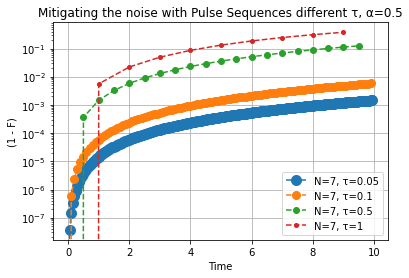

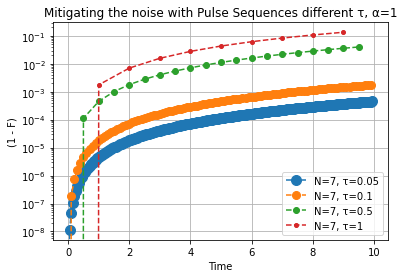

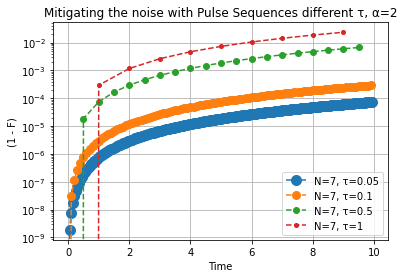

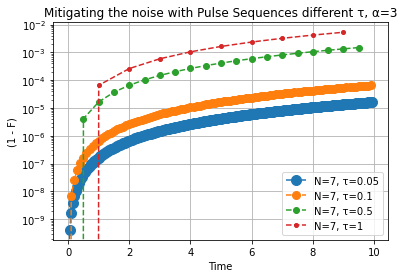

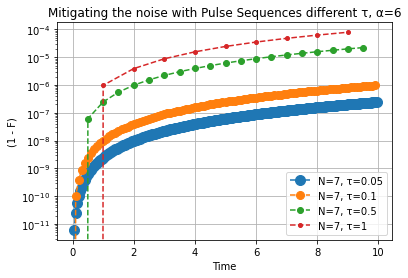

In [138]:
params['alpha_list'] = [0.5, 1, 2, 3, 6]
params['tau_list'] = [0.05, 0.1, 0.5, 1]
params['alpha'] = params['alpha_list'][0]
max_index = 8
Wx, Wy = list(range(1, max_index, 1)), list(range(1, max_index, 1))
# Wx, Wy = [3, 4], [3, 4]
params['N'] = len(Wx)
params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy)
Pseq = params['pulses']
params['n'] = len(params['pulses'])
params['opH'] = [X, Y] 
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
params['R'], params['r'] = R, r

# Hr = np.array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j,
#         0.25+0.j, 0.  +0.j],
#        [0.  +0.j, 0.25+0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j,
#         2.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j, 2.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j]])

for alpha in params['alpha_list']:
    params['alpha'] = alpha

    cls = 10
    for tau in params['tau_list']:
        psi_t, F, uOp, t = [], [], [], []
        params['tau'] = tau
    #     exphr = (-1j*tau*Hr/(params['n']))
    #     timeOpPHrP = np.linalg.inv(Pseq[3])@exphr@Pseq[3]@np.linalg.inv(Pseq[2])@exphr@Pseq[2]@np.linalg.inv(Pseq[1])@exphr@Pseq[1]@np.linalg.inv(Pseq[0])@exphr@Pseq[0]
    #     timeOpPHrP = np.eye(2**(params['N']))
    #     for i, p in enumerate(params['pulses']):
    #         timeOpPHrP = np.linalg.inv(p) @ exphr @ p @ timeOpPHrP
    #     t_list = np.arange(0, params['T'], tau)
    #     uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
        uOp, t = WPSeq_TimeEvolOp(params)
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=cls)
        cls -=2
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("(1 - F)")
        plt.title(f"Mitigating the noise with Pulse Sequences different τ, α={params['alpha']}")
        plt.grid('on')
    plt.show()
# print(Pseq[0])
# print(reduce(np.kron, [I, I, I]))
# print('**************')
# print(Pseq[1])
# print(reduce(np.kron, [I, Z, I]))
# print('**************')
# print(Pseq[2])
# print(reduce(np.kron, [I, I, Z]))
# print('**************')
# print(Pseq[3])
# print(reduce(np.kron, [I, Z, Z]))
# print('**************')

In [28]:
# lst = [[X, X, I], [Y, Y, I], [X, I, X], [Y, I, Y], [I, X, X], [I, Y, Y]]
# lst = [[X, X, I], [Y, Y, I]]
# lst =  [[X, I, X], [Y, I, Y]]
lst = [[I, X, X], [I, Y, Y]]
# lst = [[X, X], [Y, Y]]
Hr = np.zeros((8, 8), dtype = complex)
# Hr = []
for l in lst:
    Hr += reduce(np.kron, l)/(np.power(np.abs(2-3), 3))
    #     Hr += [reduce(np.kron, l)]
print(repr(Hr))

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])


In [77]:
print(reduce(np.kron, [I, Z, Z]))
print('**************')
print(np.linalg.inv(reduce(np.kron, [X, I, X])))

[[ 1  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  1]]
**************
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [32]:
HHr = np.zeros((8, 8), dtype = complex)
HHr = np.array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]) + np.array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j]]) + np.array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

print(repr(HHr))

array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j,
        0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.25+0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j,
        2.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j, 2.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j]])


In [30]:
H0 = np.array([[1]])
for i, k in enumerate(H0[0]):
    print(i)

0 1


In [16]:
# params['tau'] = 0.5
# WPSeq_TimeEvolOp(params)

In [17]:
# params['tau'] = 0.1
# WPSeq_TimeEvolOp(params)

In [12]:
Hr = np.zeros((2**2, 2**2), dtype = complex)
for lst in [[X, X], [Y, Y]]:
    Hr += reduce(np.kron, lst)
expHr = expm(-1j*Hr*1/2)
lst1, lst2 = [I, I], [I, Z]
timeOp = reduce(np.kron, lst2) @ expHr @ reduce(np.kron, lst2) @ reduce(np.kron, lst1) @ expHr @ reduce(np.kron, lst1)
print(timeOp)

[[1.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 1.+0.00000000e+00j 0.-1.11022302e-16j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+1.11022302e-16j 1.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  1.+0.00000000e+00j]]


0.05
Hr-tau=0.05
0.1
Hr-tau=0.1
0.5
Hr-tau=0.5
1
Hr-tau=1


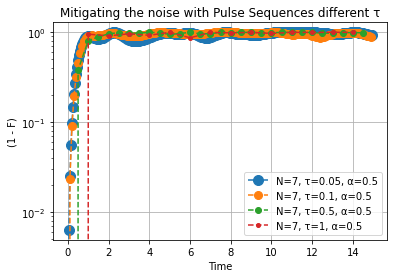

In [29]:
# max_index = 8
# Wx, Wy = list(range(1, max_index, 1)), list(range(1, max_index, 1))
# params['N'] = len(Wx)
# params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy)
# params['n'] = len(params['pulses'])
# params['opH'] = [X, Y] 
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 2
params['alpha_list'] = [0.5, 1, 1.2, 2, 3, 6]
params['tau_list'] = [0.05, 0.1, 0.5, 1]
params['alpha'] = params['alpha_list'][0]

# for alpha in params['alpha_list']:
#     params['alpha'] = alpha
cls = 10
for tau in params['tau_list']:
    psi_t, F, uOp, t = [], [], [], []
    params['tau'] = tau
    max_index = 8
    Wx, Wy = list(range(1, max_index, 1)), list(range(1, max_index, 1))
    params['N'] = len(Wx)
    params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy)
    params['n'] = len(params['pulses'])
    params['opH'] = [X, Y] 
    n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
    params['R'], params['r'] = R, r

    uOp, t = WPSeq_TimeEvolOp(params)
    psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
    F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=cls)
    cls -=2
    plt.yscale("log")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("(1 - F)")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
plt.show()


In [14]:
print(R)

[4.306293476164868e-18, 3.186308177103569e-13, 2.4414062500000014e-16, 1.7163780166626958e-15, 3.5407061614721473e-12, 4.306293476164868e-18, 1.0000000000000006e-12]


C:\Users\barbi\AppData\Local\Temp\ipykernel_10704\3431932560.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
C:\Users\barbi\AppData\Roaming\Python\Python39\site-packages\matplotlib_inline\backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


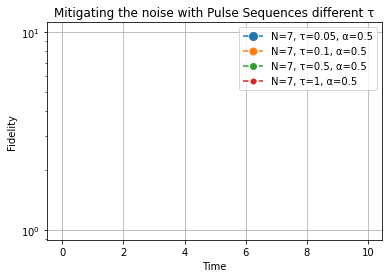

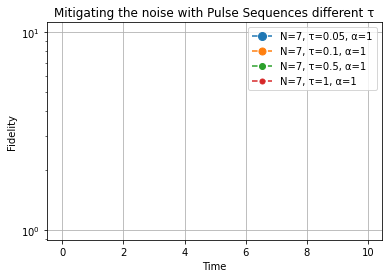

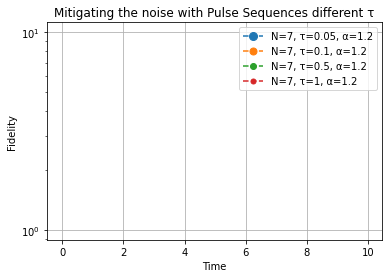

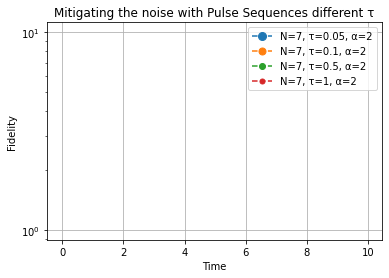

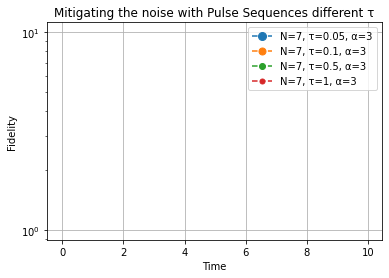

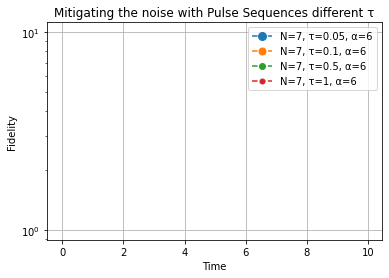

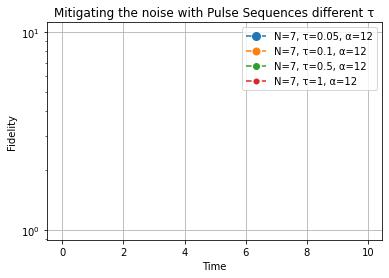

In [15]:
for alpha in params['alpha_list']:
    Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
    params['n'] = len(Pseq)
    mss = 8
    params['alpha'] = alpha
    for tau in params['tau_list']:
        params['tau'] = tau
        uOp, t = WPSeq_TimeEvolOp(params)
#         Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#         for k, p in enumerate(Pseq):
#             timeOpPHrP = np.linalg.inv(p) @ expH_r @ p @ timeOpPHrP
#         t = np.arange(0, params['T'], params['tau'])
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t)]
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#         print(F)
#         print('***********************')
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
        mss -=1
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
        plt.title("Mitigating the noise with Pulse Sequences different τ")
        plt.grid('on')
    plt.show()

In [16]:
# lst = [I, I, I]
# lst = [Z, I, Z]
# lst = [I, Z, Z]
# lst = [X, X]
# print(reduce(np.kron, lst))
# lst = [Y, Y]
# print(reduce(np.kron, lst))

Hr = np.zeros((2**2, 2**2), dtype = complex)
for lst in [[X, X], [Y, Y]]:
    Hr += reduce(np.kron, lst)
expHr = expm(-1j*Hr*0.05/2)
print(expHr)

[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.99875026+0.j         0.        -0.04997917j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.04997917j 0.99875026+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]


In [17]:
# # def WF_Generate(params, **kwargs):
# #     N, lst, W_x, W_y, tupleprdt = params['N'], [H], kwargs['W_x'], kwargs['W_y'], []
# W_y = [0, 1, 2, 3, 4]
# tupleprdt, lst = [], []

# for i, w_x in enumerate([0, 1, 2, 3, 4]):
#     H0, H1 = np.array([1]), H 
#     w_y = W_y[i]
#     q = int(np.ceil(np.log2(max(w_x, w_y)+1)))
#     print('w_x', 'w_y')
#     print((w_x, w_y))
#     print('i', 'q')
#     print(i, q)
#     if q == 0:
#         lst = [H0]
#         tupleprdt.append((1, 1)) # Since if the max(wx, wy) is 0, then both are zero.
#     else:
#         lst = [H1]
#         for i in range(q-1):
#             lst.append(lst[i])
# #     print(lst)
# #     print('*******************************')
#     Hf = reduce(np.kron, lst)
#     wx, wy = Hf[w_x], Hf[w_y]
#     print('wfx', 'wfy')
#     print((wx, wy))
#     print('*******************************')
    
# def WF_Generate(params, **kwargs):
#     N, lst, W_x, W_y, tupleprdt, q, lst = params['N'], [H], kwargs['W_x'], kwargs['W_y'], [], 0, []
#     H0, H1 = np.array([1]), H 
#     q = int(np.ceil(np.log2(max(W_x, W_y)+1)))
#     if q == 0:
#         lst = [H0]
#         tupleprdt.append((1, 1)) # Since if the max(wx, wy) is 0, then both are zero.
#     else:
#         lst = [H1]
#         for i in range(q-1):
#             lst.append(lst[i])
#     Hf = reduce(np.kron, lst)
#     w_x, w_y = Hf[W_x-1], Hf[W_y-1]
#     Hf = reduce(np.kron, lst)
#     wfx, wfy = Hf[W_x], Hf[W_y]
# #     print((w_x, w_y))
#     for i, h in enumerate(wfx):
#         tupleprdt.append((h, wfy[i]))
#     tupleprdt = WF_Conditions(tupleprdt)
#     return tupleprdt
# print(WF_Generate(params, W_x = 3, W_y = 3))


# #         lst = lst*(q-1)
# #         Hf = reduce(np.kron, lst)
# #         w_x, w_y = Hf[W_x-1], Hf[W_y-1]
# #         for i, h in enumerate(w_x):
# #             tupleprdt.append((h, w_y[i]))
# #         tupleprdt = WF_Conditions(tupleprdt)
# #     return tupleprdt
# # print(WF_Generate(params, W_x = 0, W_y = 1, index = 1))
    
# # def WF_WIList(params, **kwargs):
# #     W_x, W_y, tupleprdt, ps, Pseq = kwargs['W_x'], kwargs['W_y'], [], [], []
# #     for i, w_x in enumerate(W_x):
# #         print(i)
# #         tupleprdt.append(WF_Generate(params, W_x = w_x, W_y = W_y[i]))
# #         print(tupleprdt)
# #     return tupleprdt
# # print(WF_WIList(params, W_x = [3], W_y = [3]))

In [18]:
for a in [0, 1, 2, 3, 4, 7]:
    q = int(np.ceil(np.log2(a+1)))
    print(q)

0
1
2
2
3
3


In [19]:
lst = [H, H, H]
print(reduce(np.kron, lst)[4])
print([I for _ in range(4)])

[ 1  1  1  1 -1 -1 -1 -1]
[array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]])]


In [20]:
# W_x, W_y = [1, 2, 3], [1, 2, 3]
# params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
# params['N'] = len(W_x)
# params['n'] = len(params['pulses'])
# params['opH'] = [X, Y] 
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 2
def WPSresource_Hamiltonian_TimeEvolOp_IsingType(params, **kwargs):
    N, H_r, unitary_timeOp, opH = params['N'], np.zeros((2**params['N'], 2**params['N']), dtype = complex), 0, params['opH']
    R, r, alpha, lst = params['R'], params['r'], params['alpha'], [I for _ in range(N)]
    for op in opH:
        for i in range(N):
            for j in range(i+1, N, 1):
                lst[i] = op
                lst[j] = op
                H_r += (R[i]-R[j])*reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
                lst = [I for _ in range(N)]
    tau = params['tau']
    unitary_timeOp = expm(-1j*tau/(params['n'])*H_r)
    return H_r, unitary_timeOp
# params['N'] = 3
# params['opH'] = [X, Y]
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 1
# print(WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)[0].shape)
# print(WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)[1].shape)
    
# Need to make changes to this function 
# def WPSeq_TimeEvolOp(params, **kwargs):
#     Pseq, unitary_timeOp, PexpHr = params['pulses'], [], np.eye(2**params['N'])
#     params['n'], pexpHr_lst = len(Pseq), []
#     Hr, unitary_timeOpH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
# #     print(unitary_timeOpH_r.shape)
#     for k, p in enumerate(Pseq):
# #         print(p[0].shape)
#         if k == 0:
#             PexpHr = unitary_timeOpH_r @ p @ PexpHr
#             pexpHr_lst += [PexpHr]
#         elif k == len(Pseq)-1:
#             PexpHr = np.linalg.inv(p) @ unitary_timeOpH_r @ PexpHr
#             pexpHr_lst += [PexpHr]
#         else:
#             PexpHr = Pseq[k-1] @ np.linalg.inv(p) @ PexpHr
#             pexpHr_lst += [PexpHr]
# #         print(PexpHr.shape)
# #         print('*****************')
#         print(pexpHr_lst[0].shape)
#         pexpHr_lst += [PexpHr]
#     t_list = np.arange(0, params['tau'], params['n'])
# #     unitary_timeOp = [np.linalg.matrix_power(PexpHr, i) for i, t in enumerate(t_list)]
#     unitary_timeOp = [pexpHr_lst[i] for i, t in enumerate(t_list)]
#     return unitary_timeOp, t_list, pexpHr_lst

# print(WPSeq_TimeEvolOp(params))
# WPSeq_TimeEvolOp(params)

In [21]:
W_x, W_y = [1, 2, 3], [1, 2, 3]
params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
params['N'] = len(W_x)
params['n'] = len(params['pulses'])
params['opH'] = [X, Y] 
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
params['R'], params['r'], params['alpha'] = R, r, 2

In [22]:
def WPSeq_TimeEvolOp(params, **kwargs):
    Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
    params['n'], tau_n_list = len(Pseq), []
    print(params['tau'])
    print('******************')
    Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
    for k, p in enumerate(Pseq):
        timeOpPHrP = np.linalg.inv(p)@expH_r@p@timeOpPHrP
    t_list = np.arange(0, params['T'], params['tau'])
    unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list


0.05
******************
alpha = 0.05
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 0.05
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 0.05
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 0.05
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


C:\Users\barbi\AppData\Local\Temp\ipykernel_10704\2095673363.py:36: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


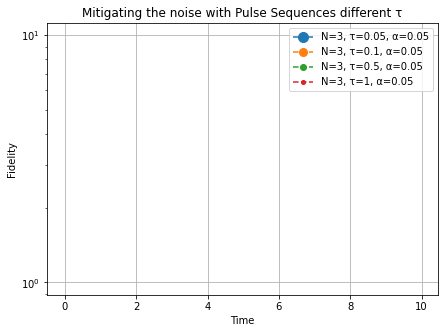

0.05
******************
alpha = 0.5
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 0.5
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 0.5
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 0.5
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


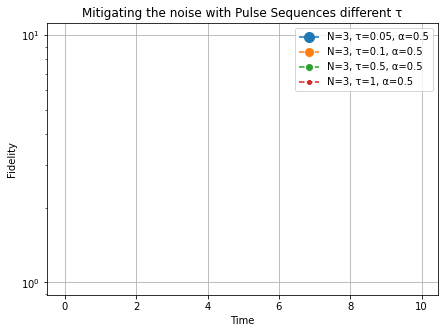

0.05
******************
alpha = 1
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 1
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 1
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 1
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


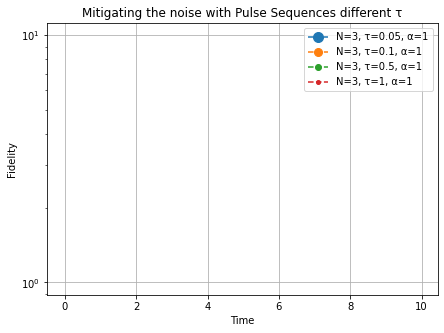

0.05
******************
alpha = 1.2
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 1.2
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 1.2
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 1.2
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


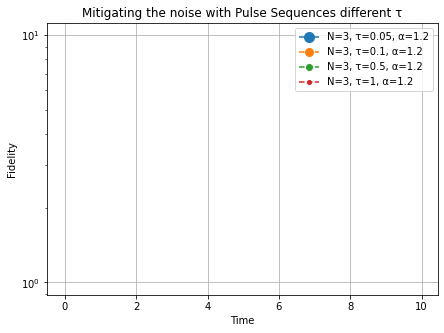

0.05
******************
alpha = 2
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 2
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 2
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 2
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


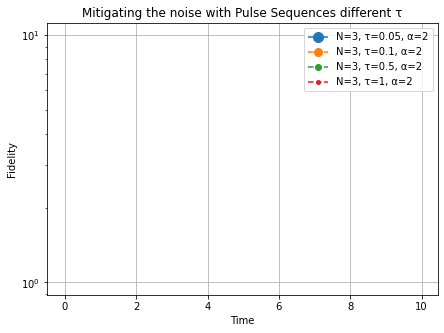

0.05
******************
alpha = 3
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 3
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 3
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 3
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


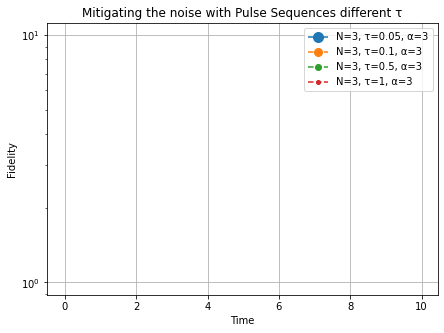

0.05
******************
alpha = 6
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 6
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 6
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 6
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


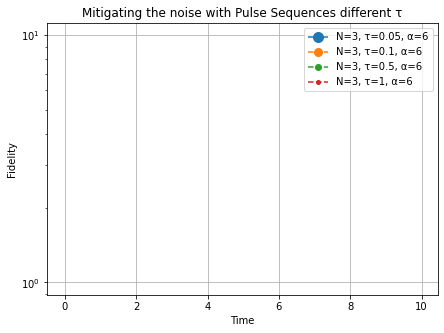

0.05
******************
alpha = 12
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 12
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 12
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 12
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


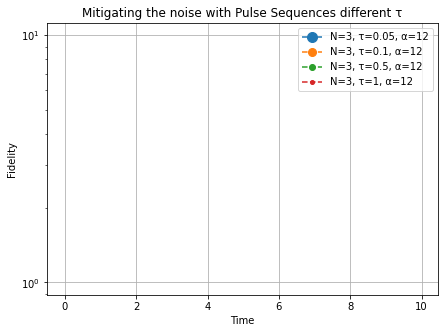

In [23]:

# def WPSeq_TimeEvolOp(params, **kwargs):
# Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
# params['n'], tau_n_list = len(Pseq), []
# for alpha in [0.05, 0.5, 1, 1.2, 2, 3, 6, 12]:
#     params['alpha'] = alpha
#     Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#     for k, p in enumerate(Pseq):
#         timeOpPHrP = np.linalg.inv(p)@expH_r@p@timeOpPHrP
#     t_list = np.arange(0, params['T'], params['tau'])
#     unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
    #     return unitary_timeOp, t_list
params['alpha_list'] = [0.05, 0.5, 1, 1.2, 2, 3, 6, 12]
for alpha in params['alpha_list']:
    params['alpha'] = alpha
    mss = 10

    plt.figure(figsize=[7,5])
    for tau in params['tau_list']:
        params['tau'] = tau
        F = []
        uOp, t = WPSeq_TimeEvolOp(params)
        alphaf = params['alpha']
#         t = np.arange(0, params['T'], params['tau'])
        print(f'alpha = {alphaf}')
        print(f'tau = {tau}')
        print(f'psi_nm.shape = {psi_nm.shape}')
        print(f'length of t = {len(t)}')
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, _ in enumerate(t)]
        print(f'length of uOp = {len(uOp)}')
        print('*************************************')
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    #     print(F)
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
        mss -=2
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
        plt.title("Mitigating the noise with Pulse Sequences different τ")
        plt.grid('on')
    plt.show()

In [24]:
# Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**params['N'])
# params['n'], timeOpPHrP_lst = len(Pseq), [] # timeOpPHrP_list stores timeOp_PHrP for each element from 0 to tau divided by n.
# Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
# #     print(unitary_timeOpH_r.shape)
# for k, p in enumerate(Pseq):
#      pass
        
# for k, p in enumerate(Pseq):
# #         print(p[0].shape)
#     if k == 0:
#         PexpHr = unitary_timeOpH_r @ p @ PexpHr
#         pexpHr_lst += [PexpHr]
#     elif k == len(Pseq)-1:
#         PexpHr = np.linalg.inv(p) @ unitary_timeOpH_r @ PexpHr
#         pexpHr_lst += [PexpHr]
#     else:
#         PexpHr = Pseq[k-1] @ np.linalg.inv(p) @ PexpHr
#         pexpHr_lst += [PexpHr]
# #         print(PexpHr.shape)
# #         print('*****************')
#     print(pexpHr_lst[0].shape)
#     pexpHr_lst += [PexpHr]
# t_list = np.arange(0, params['tau'], params['n'])
# #     unitary_timeOp = [np.linalg.matrix_power(PexpHr, i) for i, t in enumerate(t_list)]
# unitary_timeOp = [pexpHr_lst[i] for i, t in enumerate(t_list)]

In [25]:
# plt.figure(figsize=[7,5])

# for tau in params['tau_list']:
#     params['tau'] = tau
#     F = []
#     uOp, t, pexpHr_lst = WPSeq_TimeEvolOp(params)
#     psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(pexpHr_lst)]
#     F = [np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#     print(F)
#     plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
#     mss -=2
#     plt.yscale("log")
#     plt.legend()
#     plt.xlabel("Time")
#     plt.ylabel("Fidelity")
#     plt.title("Mitigating the noise with Walsh Pulse Sequences different τ")
#     plt.grid('on')
# plt.show()

In [26]:
# Creating a Hamiltonian with given Operators in any form such as [[X, X, X], [X]]
def Hamilton(params, **kwargs):
    pass

In [27]:
lst = [(X, X, I), (I, X, X), (X, I, X), (Y, Y, I), (I, Y, Y), (Y, I, Y)]  # Check how to create arrays of matrices of same type and use it for creating Walsh Functions
# lst = [(X, X), (Y, Y)]
H = np.zeros((2**3, 2**3), dtype = complex)
# H = []
for i in lst:
#     H += [reduce(np.kron, i)]
    H += reduce(np.kron, i)
    
print(H)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 2.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [28]:
lst = [X]*2
print(reduce(np.kron, lst))

[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


In [29]:
l = []
for i in range(4, 9, 1):
    l += [i]
print(l)

[4, 5, 6, 7, 8]


In [30]:
np.array(list(itertools.zip_longest(*alist, fillvalue='dummy'))).T

NameError: name 'alist' is not defined

In [ ]:
# H = np.array([[1, 1], [1, -1]])

# def WF_Conditions(tupleprdt, **kwargs): # tupleprdt is a list
#     for i, tprdt in enumerate(tupleprdt):
#         if tprdt[0] == tprdt[1] == 1:
#             tupleprdt[i] = I
#         elif tprdt[0] == -tprdt[1] == 1:
#             tupleprdt[i] = X
#         elif -tprdt[0] == tprdt[1] == 1:
#             tupleprdt[i] = Y
#         elif tprdt[0] == tprdt[1] == -1:
#             tupleprdt[i] = Z
#     return tupleprdt   
# # print(WF_Conditions(tupleprdt = [(1,1), (1,-1)]))

# def WF_Generate(params, **kwargs):
#     N, lst, W_x, W_y, tupleprdt, q, lst = params['N'], [H], kwargs['W_x'], kwargs['W_y'], [], 0, []
#     H0, H1 = np.array([1]), H 
#     q = int(np.ceil(np.log2(max(W_x, W_y)+1)))
#     if q == 0:
#         lst = [H0]
#         tupleprdt.append((1, 1)) # Since if the max(wx, wy) is 0, then both are zero.
#     else:
#         lst = [H1]
#         for i in range(q-1):
#             lst.append(lst[i])
#         Hf = reduce(np.kron, lst)
#         wfx, wfy = Hf[W_x], Hf[W_y]
#         for i, h in enumerate(wfx):
#             tupleprdt.append((h, wfy[i]))
#     tupleprdt = WF_Conditions(tupleprdt)
#     return tupleprdt
# # print(WF_Generate(params, W_x = 3, W_y = 3))
    
# def WF_WIList(params, **kwargs):
#     W_x, W_y, tupleprdt, ps, Pseq = kwargs['W_x'], kwargs['W_y'], [], [], []
#     for i, w_x in enumerate(W_x):
#         tupleprdt.append(WF_Generate(params, W_x = w_x, W_y = W_y[i]))
#     ps = [[] for _ in range(len(max(tupleprdt,key=len)))]
#     padded_tupleprdt = list(zip(*itertools.zip_longest(*tupleprdt, fillvalue=I)))
#     for i, p in enumerate(ps):
#         for j, padded_ps in enumerate(padded_tupleprdt):
#             ps[i].append(padded_ps[i])
#     for i, p in enumerate(ps):
#         Pseq += [reduce(np.kron, p)]
#     return Pseq
# # print(len(WF_WIList(params, W_x = [1, 2, 3], W_y =  [1, 2, 3])))
# # print(WF_WIList(params, W_x = [1, 2, 3], W_y = [1, 2, 3]))

# def WPSresource_Hamiltonian_TimeEvolOp_IsingType(params, **kwargs):
#     N, opH, unitary_timeOp = params['N'], params['opH'], 0
#     H_r, R, r, alpha = np.zeros((2**N, 2**N), dtype = complex), params['R'], params['r'], params['alpha']
#     lst = [I for _ in range(N)]
#     for op in opH:
#         for i in range(N):
#             for j in range(i+1, N, 1):
#                 lst[i] = op
#                 lst[j] = op
#                 H_r += R[i]*reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
#                 lst = [I for _ in range(N)]
#     tau = params['tau']
#     unitary_timeOp = expm((-1j*tau*H_r)/(params['n']))
#     return H_r, unitary_timeOp

In [ ]:
# def WPSeq_TimeEvolOp(params, **kwargs):
#     Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
#     params['n'] = len(Pseq)
# #     print(params['tau'])
# #     print('******************')
#     Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#     for k, p in enumerate(Pseq):
#         timeOpPHrP = np.linalg.inv(p) @ expH_r @ p @ timeOpPHrP
#     t_list = np.arange(0, params['T'], params['tau'])
#     unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
#     return unitary_timeOp, t_list

In [ ]:
# max_index = 8
# W_x, W_y = list(range(1, max_index, 1)), list(range(1, max_index, 1))
# params['N'] = len(W_x)
# params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
# params['n'] = len(params['pulses'])
# params['opH'] = [X, Y] 
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 2
# params['alpha_list'] = [0.5, 1, 1.2, 2, 3, 6, 12]

In [ ]:
# for alpha in params['alpha_list']:
#     Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
#     params['n'] = len(Pseq)
#     mss = 10
#     params['alpha'] = alpha
#     for tau in params['tau_list']:
#         params['tau'] = tau
# #         uOp, t = WPSeq_TimeEvolOp(params)
#         Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#         for k, p in enumerate(Pseq):
#             timeOpPHrP = np.linalg.inv(p) @ expH_r @ p @ timeOpPHrP
#         t = np.arange(0, params['T'], params['tau'])
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t)]
#         psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
#         F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
# #         print(F)
# #         print('***********************')
#         plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
#         mss -=3
#         plt.yscale("log")
#         plt.legend()
#         plt.xlabel("Time")
#         plt.ylabel("Fidelity")
#         plt.title("Mitigating the noise with Pulse Sequences different τ")
#         plt.grid('on')
#     plt.show()

# Section 3: A and B

In [223]:
H = np.array([[1, 1], [1, -1]])

def WF_PulseRotErr(params, **kwargs): 
    """
    **kwargs : W_e, required
        'W_e' is a list of Walsh Indices
    Returns: A list of columns from the
        generalized Hadamard Matrix
        corresponding to each index in
        W_e.
    """
    N, W_e = params['N'], kwargs['W_e']
    H0, H1, lst, q = np.array([1]), H, [], int(np.ceil(np.log2(np.max(W_e)+1)))
    lst = [H1]
    for i in range(q-1):
        lst.append(lst[i])
    Hf = reduce(np.kron, lst)
#     print(Hf)
    Wf_Qbit = [Hf[we] for we in W_e]
#     Wf_Qbit = [[] for _ in range(len(W_e))]
#     print(Wf_Qbit)
#     for i, wfqbit in enumerate(Wf_Qbit):
#         for j, we in enumerate(W_e):
#             print(f'Hf[we][i] = {Hf[we][i]}')
#             Wf_Qbit[j] += [Hf[we][i]]
#             print(f'Wf_Qbit = {Wf_Qbit}')
#         print('***************')
#     print(Wf_Qbit)
    return Wf_Qbit
# print(WF_PulseRotErr(params, W_e = [0, 1, 2, 3]))
        

# params['deltaErr_list'] = list(range(0, params['N'], 2))
params['deltaErr_list'] = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0055, 0.0006, 0.0065, 0.0007, 0.0008]
W_x = [0, 1]
W_y = [0, 1]
Pseq = WF_WIList(params, W_x = W_x, W_y = W_y)
def pulse_rotationErrors(params, **kwargs): # eq21 from the paper
    """
    **kwargs : W_e, W_x, W_y required
        'W_f' is a list of Walsh Indices
    Returns: A list of sublists of PulseErrors stored corresponding to l'th index.
    """
    W_x, W_y, deltaErr_list, W_e = kwargs['W_x'], kwargs['W_y'], params['deltaErr_list'], kwargs['W_e']
    Pseq = WF_WIList(params, W_x = W_x, W_y = W_y)
    Pseq_Err, Wf_Qbit = [[] for _ in range(len(Pseq))], WF_PulseRotErr(params, W_e = W_e)
#     print(len(Pseq))
    for i, ps_err in enumerate(Pseq_Err):
        for j, si in enumerate(Wf_Qbit):
#             print(f'i,j = {i,j}',si[i])
            Pseq_Err[i] += [expm(-1j*(si[i])*(np.pi + deltaErr_list[j])*Pseq[j]/2)]
#             Pseq_Err[i] += [expm(-1j*(si[i])*(np.pi + deltaErr_list[j])*Pseq[j]/2)] # Stored l-wise
#             print(f'i,j={i,j}',Pseq_Err[i][j])
#             Pseq_Err[i] += [expm(-1j*(Wf_Qbit[i][j])*(np.pi + deltaErr_list[i])*Pseq[i]/2)] # Stored sitewise
    return Pseq_Err, Pseq
print(pulse_rotationErrors(params, W_x = [0, 1], W_y = [0, 1], W_e = [0, 1])[1])

def WF_TimeEvolOp_HRA_Err(params, **kwargs): # Equations 23
    W_x, W_y, W_e, delErr_lst = kwargs['W_x'], kwargs['W_y'], kwargs['W_e'], params['deltaErr_list']
    params['N'] = len(W_x)
    N, R = params['N'], params['R']
    Wf_x, Wf_y, Wf_e = WF_PulseRotErr(params, W_e = W_x), WF_PulseRotErr(params, W_e = W_y), WF_PulseRotErr(params, W_e = W_e)
    H_RAErr = np.zeros((2**N, 2**N), dtype = complex)
    Pseq_Err, Pseq = pulse_rotationErrors(params, W_x = W_x, W_y = W_y, W_e = W_e)
    params['n'], params['pulses'] = len(Pseq_Err), Pseq
    n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
    params['R'], params['r'] = R, r
#     print(Pseq[0].shape)
#     print(Pseq)
    timeOp_PHerrP, timeOp_HRAErr = np.ones((2**N, 2**N)), np.ones((2**N, 2**N))
    unitary_timeOp, pulses = [], np.zeros((2**N, 2**N))
#     lst_Y, lst_X, lst_Z = [Y for _ in range(N)], [X for _ in range(N)], [Z for _ in range(N)]
#     Y_N, X_N, Z_N = reduce(np.kron, lst_Y), reduce(np.kron, lst_X), reduce(np.kron, lst_Z)  
#     HXij, HYij = np.zeros((2**N, 2**N), dtype = complex), np.zeros((2**N, 2**N), dtype = complex)
#     HXji, HYji = np.zeros((2**N, 2**N), dtype = complex), np.zeros((2**N, 2**N), dtype = complex)
    HXij, HYij = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
    HXji, HYji = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
#     print(f'HYji.shape = {HYji.shape}')
    lst1, lst2 = [I for _ in range(N)], [I for _ in range(N)]
    Hra_lst = []
#     print(Y_N.shape)
#     print(params['N'])
#     print(Wf_e[0][1])
#     print(H_RAErr.shape)
    for l in range(len(W_e)):
        for op in params['opH']:
            for i in range(params['N']):
                for j in range(i+1, params['N'], 1):
                    for k in range(params['n']):
#                         print('Blablabla....................Blablabla....................Blablabla....................')
                        if np.array_equal(op, X) == True:
#                             print('Blablabla....................Blablabla....................Blablabla....................')
                            HXij += ((1-Wf_x[i][k])/2)*Wf_x[j][k]*((((1-Wf_y[i][k])/2)*Y) - (((1+Wf_y[i][k])/2)*Z))
                            HXji += ((1-Wf_x[j][k])/2)*Wf_x[i][k]*((((1-Wf_y[j][k])/2)*Y) - (((1+Wf_y[j][k])/2)*Z))
#                             print(f'HXij.shape = {HXij.shape}')
                        elif np.array_equal(op, Y) == True:
#                             print(f'HYji.shape = {HYji.shape}')
                            HYij += ((1-Wf_y[i][k])/2)*Wf_y[j][k]*((((1+Wf_x[i][k])/2)*Z) - (((1-Wf_x[i][k])/2)*X))
                            HYji += ((1-Wf_y[j][k])/2)*Wf_y[i][k]*((((1+Wf_x[j][k])/2)*Z) - (((1-Wf_x[j][k])/2)*X))
                    HXij, HYij, HXji, HYji  = HXij/params['n'], HYij/params['n'], HXji/params['n'], HYji/params['n']
                    if np.array_equal(op, X)== True:
                        lst1[i], lst1[j] = HXij, op
                        lst2[i], lst2[j] = op, HXji
#                         print(f'reduce(np.kron, lst1).shape = {reduce(np.kron, lst1).shape}')
                        H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*reduce(np.kron, lst1) + 
                                                                          delErr_lst[j]*reduce(np.kron, lst2))

#                         H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*Wf_e[i][l]*reduce(np.kron, lst1) + 
#                                                                           delErr_lst[j]*Wf_e[j][l]*reduce(np.kron, lst2))
                    elif np.array_equal(op, Y)== True:
                        lst1[i], lst1[j] = HYij, op
                        lst2[i], lst2[j] = op, HYji
                        H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*reduce(np.kron, lst1) + 
                                                                          delErr_lst[j]*reduce(np.kron, lst2))
#                         H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*Wf_e[i][l]*reduce(np.kron, lst1) + 
#                                                                           delErr_lst[j]*Wf_e[j][l]*reduce(np.kron, lst2))
                    lst1, lst2 = [I for _ in range(params['N'])], [I for _ in range(params['N'])]
                    HXij, HYij = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
                    HXji, HYji = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
#         print(H_RAErr.dtype)
        Hra_lst +=[H_RAErr]
        timeOp_HRAErr = expm(-1j*H_RAErr*params['tau']/params['n'])
#         print(f'Pseq_Err[l][0].shape = {Pseq_Err[l][0].shape}')
        pulses = reduce(np.matmul, Pseq_Err[l])
#         print(f'pulses.shape = {pulses.shape}')
#         print(f'timeOp_HRAErr.shape = {timeOp_HRAErr.shape}')
        timeOp_PHerrP = np.linalg.inv(pulses) @ timeOp_HRAErr @ pulses @ timeOp_PHerrP
    t_list = np.arange(0, params['T'], params['tau']) 
    unitary_timeOp = [np.linalg.matrix_power(timeOp_PHerrP, i) for i, t in enumerate(t_list)]
#     print(f'sum={sum(Hra_lst)}')
    return unitary_timeOp, t_list

# WF_TimeEvolOp_HRA_Err(params, W_x =[0,1], W_y = [0,1], W_e = [0,1])
            
   


[array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]), array([[ 1,  0,  0,  0],
       [ 0, -1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0, -1]])]


C:\Users\barbi\AppData\Local\Temp\ipykernel_10704\444936190.py:6: RuntimeWarning: invalid value encountered in true_divide
  NWF = psi/(np.sqrt(np.vdot(psi, psi)))
C:\Users\barbi\AppData\Local\Temp\ipykernel_10704\659793803.py:24: RuntimeWarning: invalid value encountered in matmul
  psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]


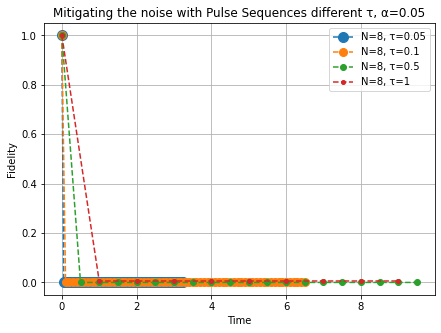

C:\Users\barbi\AppData\Local\Temp\ipykernel_10704\659793803.py:24: RuntimeWarning: overflow encountered in matmul
  psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]


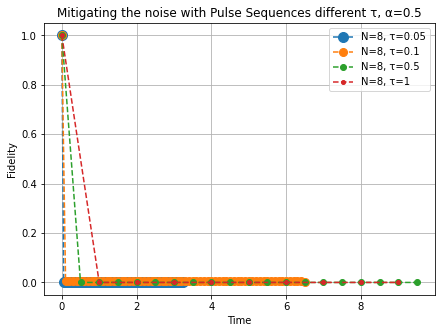

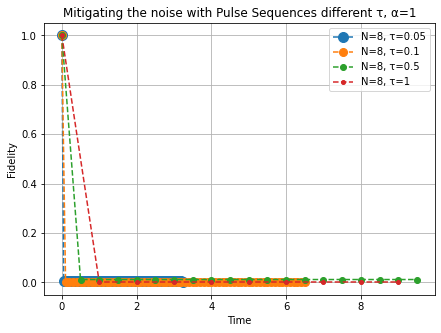

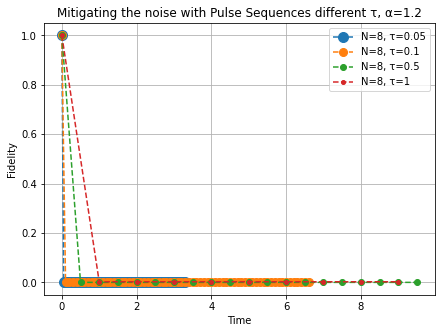

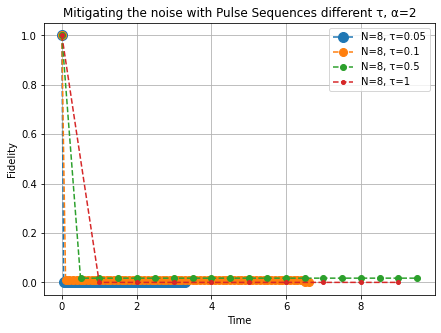

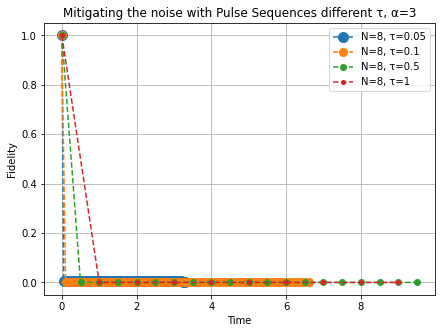

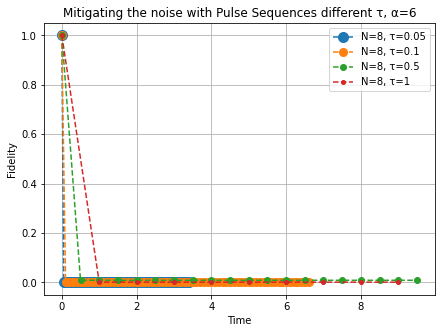

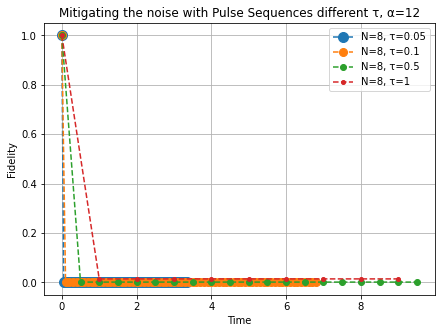

In [200]:
max_index = 8
W_x, W_y = list(range(0, max_index, 1)), list(range(0, max_index, 1))
params['deltaErr_list'] = [0.01, 0.02, 0.03, 0.04, 0.05, 0.55, 0.06, 0.65, 0.07, 0.08]
params['alpha_list'] = [0.05, 0.5, 1, 1.2, 2, 3, 6, 12]
for alpha in params['alpha_list']:
    params['alpha'] = alpha
    mss = 10

    plt.figure(figsize=[7,5])
    for tau in params['tau_list']:
        params['tau'] = tau
        F = []
        uOp, t = WF_TimeEvolOp_HRA_Err(params, W_x = W_x, W_y = W_y, W_e = W_x)
        n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
        alphaf = params['alpha']
#         t = np.arange(0, params['T'], params['tau'])
#         print(f'alpha = {alphaf}')
#         print(f'tau = {tau}')
#         print(f'psi_nm.shape = {psi_nm.shape}')
#         print(f'length of t = {len(t)}')
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, _ in enumerate(t)]
#         print(f'length of uOp = {len(uOp)}')
#         print('*************************************')
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    #     print(F)
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=mss)
        mss -=2
#         plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
        plt.title(f"Mitigating the noise with Pulse Sequences different τ, α={params['alpha']}")
        plt.grid('on')
    plt.show()

In [ ]:
# def WF_TimeEvolOp_HRA_Err(params, **kwargs): # This gives timeOp for H_RA, ERR
#     opH, R, alpha, W_x, W_y, W_e = params['opH'], params['R'], params['alpha'], kwargs['W_x'], kwargs['W_y'], kwargs['W_e']
#     Pseq_Err = pulse_rotationErrors(params, W_x = W_x, W_y = W_y, W_e = W_e)
#     params['n'] = len(Pseq_Err)
    
#     pass
    
# What I have to do is create another function that creates a list of wf for different qubits that happen at l'th time 
# and, then send them in for each value of l for different qubits. 
# After I do it for one period that is period l, I do it for T/tau times where tau is the time evolution for Hr,
# and this is repeated for T/tau times - this would be my final unitary_timeOp.
# Question here is should I evolve avg error Hamiltonian or the the hamiltonian itself?
# Yes, I think because I am doing this to get rid of errors due to this avg error H.

In [ ]:
def WF_TimeEvolOp(params, **kwargs):
    pass

In [78]:
print(expm(-1j*(-1)*(np.pi + params['deltaErr_list'][1])*Pseq[1]/2))

[[-0.01999867+0.99980001j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.01999867-0.99980001j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.01999867+0.99980001j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.01999867-0.99980001j]]


In [62]:
W_e = [1, 2, 5, 4]
print(max(W_e))

5


In [211]:
a = np.array([[1, 1], [1, 1]])
b = np.array([[2, 3], [1, 0]])
print(a@b)
lst = [a, b]
print(reduce(np.matmul, lst))

[[3 3]
 [3 3]]
[[3 3]
 [3 3]]


In [220]:
# print((X+Y+Z) @ (X-Y-Z) - (X-Y-Z) @ (X+Y+Z)) #1, 2
# print((X+Y+Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X+Y+Z)) #1, 3
# print((X+Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X+Y+Z)) #1, 4
# print((X-Y-Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X-Y-Z)) #2, 3
# print((X-Y-Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X-Y-Z)) #2, 4
# print((-X-Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (-X-Y+Z)) #3, 4

print(((X+Y+Z) @ (X-Y-Z) - (X-Y-Z) @ (X+Y+Z)) + ((X+Y+Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X+Y+Z)) + ((X+Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X+Y+Z))
+ ((X-Y-Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X-Y-Z)) + ((X-Y-Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X-Y-Z)) + ((-X-Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (-X-Y+Z)))

[[0.-8.j 0.+0.j]
 [0.+0.j 0.+8.j]]


In [213]:
# print((X+Y) @ (X-Y) - (X-Y) @ (X+Y))

[[0.-4.j 0.+0.j]
 [0.+0.j 0.+4.j]]


In [214]:
# print((Y@X) - (X@Y))

[[0.-2.j 0.+0.j]
 [0.+0.j 0.+2.j]]


In [3]:
print(reduce(np.kron, [H, H]))

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


In [4]:
x = 10
def my_function(x):
    return x * 2


In [6]:
x = 5
result = my_function(x)
print(result) 

10


In [7]:
result = my_function(x=3)
print(result) 

6
